#Recommender System with Surprise

### surprise - Simple Python Recommendation System Engine

- https://github.com/yzzhang/machine-learning/blob/master/recommender/netflix-demo.ipynb
- https://towardsdatascience.com/machine-learning-for-building-recommender-system-in-python-9e4922dd7e97
- Hướng dẫn chi tiết: https://surprise.readthedocs.io/en/stable/getting_started.html
- http://surpriselib.com/
- List of Support Algorithms in **surprise** package:

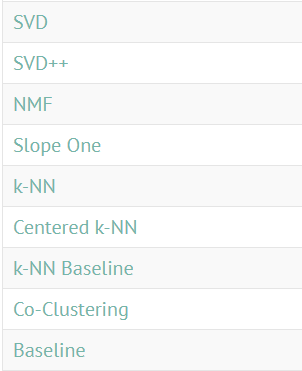

In [ ]:
!pip install surprise

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

%cd '/content/gdrive/My Drive/LDS0/Topic_8_2/demo/'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS0/Topic_8_2/demo


In [1]:
import pandas as pd
import numpy as np
# from surprise import Reader, Dataset, SVD, SVDpp, NMF, SlopeOne, KNNBasic, KNNBaseline, KNNWithMeans, KNNWithZScore, CoClustering, BaselineOnly
from surprise import *
from surprise.model_selection.validation import cross_validate

In [2]:
df = pd.read_csv("DATA/cung_cap_HV/movielens_ratings.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  1501 non-null   int64  
 1   rating   1501 non-null   float64
 2   userId   1501 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 35.3 KB


In [4]:
df.head()

,movieId,rating,userId
0,2,3.0,0
1,3,1.0,0
2,5,2.0,0
3,9,4.0,0
4,11,1.0,0


In [5]:
n_ratings = len(df)
n_movies = len(df['movieId'].unique())
n_users = len(df['userId'].unique())

In [6]:
display(n_ratings, n_movies, n_users)

1501

100

30

In [7]:
df['movieId'].value_counts()

6     20
29    20
22    20
51    20
50    20
      ..
41    10
93    10
46    10
42     8
8      7
Name: movieId, Length: 100, dtype: int64

In [8]:
# https://surprise.readthedocs.io/en/stable/reader.html
reader = Reader()
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [9]:
# https://www.youtube.com/watch?v=8wLKuscyO9I
# Singular value decomposition
# algorithm = SVD()
algorithm = KNNBasic()
# Run 5-fold cross-validation and print results
results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1481  1.1237  1.1578  1.1839  1.0832  1.1393  0.0341  
MAE (testset)     0.9077  0.8646  0.9005  0.9406  0.8674  0.8961  0.0281  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.01    0.00    0.00    0.00    0.00    


In [10]:
results

{'test_rmse': array([1.14811387, 1.1236637 , 1.15783434, 1.18389246, 1.083194  ]),
 'test_mae': array([0.90765263, 0.86457279, 0.90047727, 0.94064639, 0.86735624]),
 'fit_time': (0.0010023117065429688,
  0.0010972023010253906,
  0.0,
  0.0010938644409179688,
  0.0013320446014404297),
 'test_time': (0.004259824752807617,
  0.004309177398681641,
  0.0070879459381103516,
  0.0035943984985351562,
  0.004209280014038086)}

In [11]:
# If the results are OK => getting full dataset => fit model
trainset = data.build_full_trainset()
algorithm.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


### Recommender for a specific user

In [12]:
# userId = 27 has seen some movies:
userId = 27
df_select = df[(df['userId'] == userId) & (df['rating'] >=3)]
df_select = df_select.set_index('movieId')
#df_select = df_select.join(df_title)['Name']
df_select.head(df_select.shape[0])

,rating,userId
movieId,,
18,4.0,27
19,3.0,27
27,3.0,27
33,3.0,27
44,3.0,27
51,3.0,27
55,3.0,27
66,3.0,27
75,3.0,27


In [13]:
df_select.shape

(11, 2)

In [14]:
df_score = df[["movieId"]]

In [15]:
df_score

,movieId
0,2
1,3
2,5
3,9
4,11
...,...
1496,90
1497,93
1498,94
1499,97


- Once the model has been evaluated to our satisfaction, then we can re-train the model using the entire training dataset

In [16]:
# The following are the top 5 movies to be recommended to the user with userId
# To recommend products (i.e., movies) to the given user,
# we can sort the list of movies in decreasing order of predicted ratings
# and take the top N movies as recommendations:
df_score['EstimateScore'] = df_score['movieId'].apply(lambda x: algorithm.predict(userId, x).est) # est: get EstimateScore
df_score = df_score.sort_values(by=['EstimateScore'], ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23152\2382982136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['EstimateScore'] = df_score['movieId'].apply(lambda x: algorithm.predict(userId, x).est) # est: get EstimateScore


In [17]:
df_score = df_score.drop_duplicates()

In [18]:
df_score.head()

,movieId,EstimateScore
971,32,3.063436
561,18,2.748508
449,90,2.639691
1221,30,2.610390
10,23,2.572454


In [19]:
df_score[df_score.EstimateScore>=3]

,movieId,EstimateScore
971,32,3.063436
